In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import model_based_agent as mba

In [84]:
def load_data(folder,iters_completed):
    # Loads data while things are still running. To check up on progress
    trajs = []
    evals,mods = [],[]
    for i in range(iters_completed):
        with open(folder+f'collect{i}.pkl','rb') as f:
            trajs.append(pickle.load(f))
        for j in range(3):
            evals.append([[] for _ in range(3)])
            mods.append([[] for _ in range(3)])
            with open(folder+f'eval{i}_{j}.pkl','rb') as f:
                evals[i][j] = pickle.load(f)
            with open(folder+f'mod{i}_{j}.pkl','rb') as f:
                mods[i][j] = pickle.load(f)
    return trajs,evals,mods

def print_rewards(evals,trajs,ind,lp_vec=[1/2,1/3,1/4]):
    print('Evaluation rewards:')
    for i in range(3):
        print('\tLP_frac',np.round(lp_vec[i],2),': ',np.round(np.mean(evals[ind][i]['reward']),2))
    print('Random trajectory reward:')
    print('\t',np.round(np.mean(trajs[ind]['reward']),2))

def plot_mods(models,vmin=None,vmax=None):
    fig,ax = plt.subplots(len(models),7)
    fig.set_size_inches((15,2*len(models)))
    for m,mod in enumerate(models):
        for i,(key,item) in enumerate(mod.items()):
            if i<4:
                img = ax[m,i].imshow(item[:,:,0],vmin=-180,vmax=180)
            else:
                img = ax[m,i].imshow(item[:,:,0],vmin=vmin,vmax=vmax)
            fig.colorbar(img,ax=ax[m,i])
            ax[m,i].axis('off')
            if m==0:
                ax[m,i].set_title(f'{len(models)} models: {key}')
        ax[m,6].imshow(np.sign(mod['reward_on']-mod['reward_off'])[:,:,0],vmin=-1,vmax=1)

In [87]:
trajs,evals,mods = load_data('Data/Test15-01-13-55/', 3)

In [67]:
print_rewards(evals,trajs,0)

Evaluation rewards:
	LP_frac 0.5 :  0.04
	LP_frac 0.33 :  -0.05
	LP_frac 0.25 :  -0.13
Random trajectory reward:
	 -0.05


In [69]:
print_rewards(evals,trajs,1)

Evaluation rewards:
	LP_frac 0.5 :  -0.07
	LP_frac 0.33 :  -0.02
	LP_frac 0.25 :  0.22
Random trajectory reward:
	 -0.17


In [88]:
print_rewards(evals,trajs,2)

Evaluation rewards:
	LP_frac 0.5 :  -0.14
	LP_frac 0.33 :  -0.02
	LP_frac 0.25 :  0.09
Random trajectory reward:
	 0.06


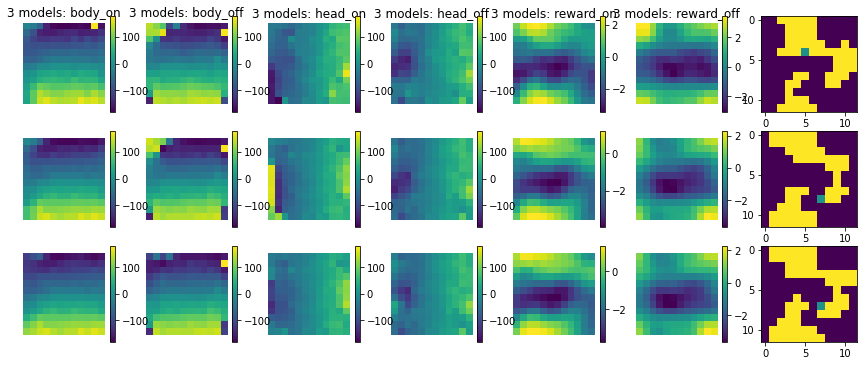

In [89]:
mods_plt = [mods[0][0],mods[1][0],mods[2][0]]
plot_mods(mods_plt)